<a href="https://colab.research.google.com/github/Titiksha20/Employee-Attrition-Prediction/blob/main/Employee_Attrition_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('train.csv')
data2 = pd.read_csv('test.csv')

In [46]:
data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,0,1,2,3,3,571,3,0,3,2,4,2,2564,0,0,14,3,0,12,2,11,7,6,7,4,1
1,2,36,0,2,1,12,4,1,1614,3,0,3,4,3,1,4663,9,1,12,3,2,7,2,3,2,1,1,2,1
2,3,55,1,2,2,2,1,3,842,3,1,3,7,4,2,5160,4,0,16,3,0,12,3,9,7,7,3,5,1
3,4,39,0,2,1,24,1,1,2014,1,1,3,6,4,2,4108,7,0,13,3,0,18,2,7,7,1,7,4,1
4,5,37,0,2,1,3,3,4,689,3,1,3,4,3,1,9434,1,0,15,3,1,10,2,10,7,7,8,1,1


In [27]:
df = data.drop_duplicates()

In [29]:
data.duplicated().any()

False

In [30]:
from sklearn.preprocessing import LabelEncoder


In [31]:
for columns in data.columns:
    if data[columns].dtype == int:
        continue
    else:
        data[columns] = LabelEncoder().fit_transform(data[columns])

In [47]:
data2.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,2,1,9,3,3,377,4,1,3,6,4,1,2070,1,0,23,4,1,5,3,5,2,0,4,5,1
1,2,31,2,2,6,4,3,653,1,1,4,7,4,0,5460,4,0,22,4,2,13,4,7,7,5,7,3,1
2,3,37,2,1,6,3,3,474,3,1,4,6,1,0,5974,4,1,13,3,2,13,2,7,7,6,7,4,1
3,4,42,2,1,1,2,1,827,4,0,2,4,4,1,6062,9,1,13,3,1,8,4,4,3,0,2,5,1
4,5,45,0,1,4,2,1,972,3,1,3,2,2,1,4447,1,0,12,3,0,9,5,9,7,0,8,2,1


In [48]:
for columns in data2.columns:
    if data2[columns].dtype == int:
        continue
    else:
        data2[columns] = LabelEncoder().fit_transform(data2[columns])

In [49]:

data2.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,2,1,9,3,3,377,4,1,3,6,4,1,2070,1,0,23,4,1,5,3,5,2,0,4,5,1
1,2,31,2,2,6,4,3,653,1,1,4,7,4,0,5460,4,0,22,4,2,13,4,7,7,5,7,3,1
2,3,37,2,1,6,3,3,474,3,1,4,6,1,0,5974,4,1,13,3,2,13,2,7,7,6,7,4,1
3,4,42,2,1,1,2,1,827,4,0,2,4,4,1,6062,9,1,13,3,1,8,4,4,3,0,2,5,1
4,5,45,0,1,4,2,1,972,3,1,3,2,2,1,4447,1,0,12,3,0,9,5,9,7,0,8,2,1


In [50]:
from sklearn.model_selection import train_test_split as tts

In [51]:
import matplotlib.pyplot as plt

In [52]:
X_train , y_train = data.drop('Attrition',axis = 1),data['Attrition']
X_test = data2

In [53]:
data.skew()

Id                         0.000000
Age                        0.431541
Attrition                  0.071364
BusinessTravel            -1.324338
Department                -0.029569
DistanceFromHome           0.868562
Education                 -0.316489
EducationField             0.501264
EmployeeNumber             0.087232
EnvironmentSatisfaction   -0.237162
Gender                    -0.459212
JobInvolvement            -0.509537
JobRole                   -0.397307
JobSatisfaction           -0.248297
MaritalStatus             -0.321249
MonthlyIncome              1.561333
NumCompaniesWorked         0.985959
OverTime                   0.469855
PercentSalaryHike          0.831123
PerformanceRating          1.904065
StockOptionLevel           1.208191
TotalWorkingYears          1.169746
TrainingTimesLastYear      0.466597
YearsAtCompany             1.943081
YearsInCurrentRole         1.115557
YearsSinceLastPromotion    2.071732
YearsWithCurrManager       1.015049
CommunicationSkill        -0

In [54]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Attrition',axis = 1),data['Attrition'],test_size = 0.2,random_state = 1)

clf1 = DecisionTreeClassifier(); clf2 = LogisticRegression();

clf1.fit(X_train, y_train); clf2.fit(X_train, y_train);

    
y_score1 = clf1.predict_proba(X_test)[:,1]
y_score2 = clf2.predict_proba(X_test)[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


roc_auc_score for DecisionTree:  0.8772590361445783
roc_auc_score for Logistic Regression:  0.945632530120482


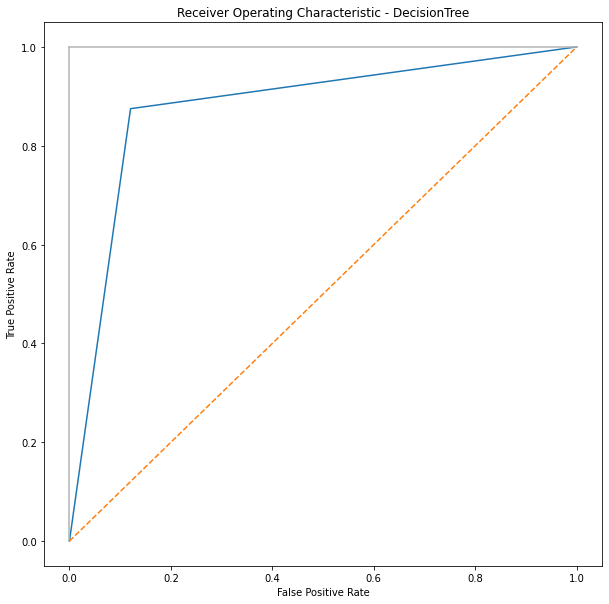

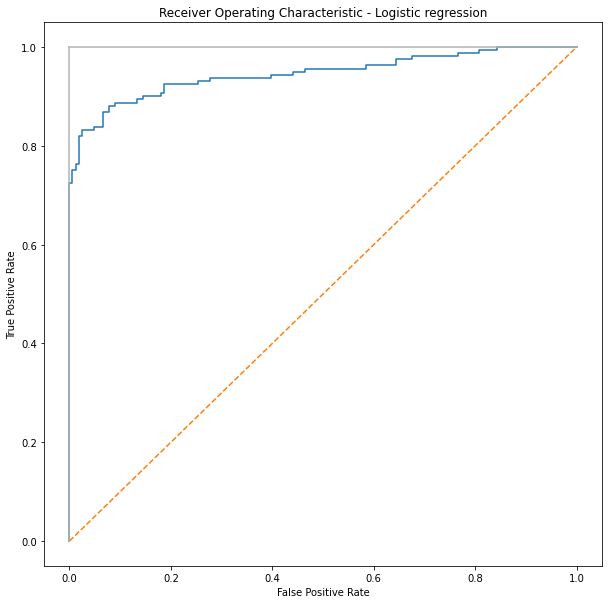

In [56]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

    
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
X = data2
y_score3 = clf2.predict_proba(X)[:,1]


In [59]:
dff = pd.DataFrame(y_score3 , columns = ['Attrition'] )
dff['Id'] = np.arange(start=1, stop=471 )
dff.set_index('Id').head()

,Attrition
Id,
1,0.016919
2,0.013747
3,0.039934
4,0.013942
5,0.002697


In [60]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# create a random sample dataframe
df = dff

In [61]:
create_download_link(df)